In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
ride_data= pd.read_csv("ride_data.csv")
city_data= pd.read_csv("city_data.csv")

# Combine the data into a single dataset
combined_driver_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
combined_driver_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

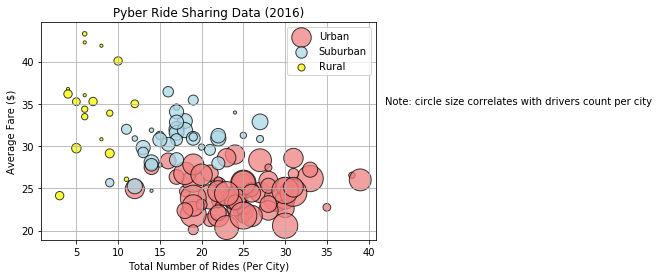

In [6]:

#Urban df setup & scatter plot
urban_drivers = combined_driver_data[combined_driver_data.type == "Urban"]
urban_drivers = urban_drivers.groupby(["city"])
urban_x_axis = urban_drivers["ride_id"].count()
urban_y_axis = urban_drivers["fare"].mean()
urban_circle_size = urban_drivers["driver_count"].mean()

urban_plot = plt.scatter(urban_x_axis, urban_y_axis, facecolors="lightcoral", edgecolors="black", 
                         s=urban_circle_size*10, alpha=0.75)
plt.grid()

#Suburban df setup & scatter plot
suburban_drivers = combined_driver_data[combined_driver_data.type == "Suburban"]
suburban_drivers = suburban_drivers.groupby(["city"])
suburban_x_axis = suburban_drivers["ride_id"].count()
suburban_y_axis = suburban_drivers["fare"].mean()
suburban_circle_size = suburban_drivers["driver_count"].mean()

suburban_plot = plt.scatter(suburban_x_axis, suburban_y_axis, facecolors="lightblue", edgecolors="black", 
                            s=suburban_circle_size*10, alpha=0.75)
plt.grid()

#Rural df setup & scatter plot
rural_drivers = combined_driver_data[combined_driver_data.type == "Rural"]
rural_drivers = rural_drivers.groupby(["city"])
rural_x_axis = rural_drivers["ride_id"].count()
rural_y_axis = rural_drivers["fare"].mean()
rural_circle_size = rural_drivers["driver_count"].mean()

rural_plot = plt.scatter(rural_x_axis, rural_y_axis, facecolors="yellow", edgecolors="black", 
                         s=rural_circle_size*10,alpha=0.75)
plt.grid()

#Graph cleanup
names = ["Urban", "Suburban", "Rural"]
plt.legend(names, loc="best")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42,35,"Note: circle size correlates with drivers count per city")
plt.savefig("bubble_plot.png")
plt.show()


## Total Fares by City Type

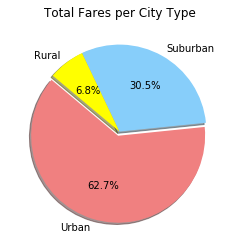

In [3]:
#Total fares per City Type 
urban_data = combined_driver_data[combined_driver_data.type == "Urban"]
urban_fares = urban_data["fare"].sum()

suburban_data = combined_driver_data[combined_driver_data.type == "Suburban"]
suburban_fares = suburban_data["fare"].sum()

rural_data = combined_driver_data[combined_driver_data.type == "Rural"]
rural_fares = rural_data["fare"].sum()

#Pie data 
sizes = [urban_fares, suburban_fares, rural_fares]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral","lightskyblue", "yellow"]
explode = (0.05, 0, 0)

#Pie setup and display  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares per City Type")
plt.savefig("Pie_Chart_Fares.png")
plt.show()



## Total Rides by City Type

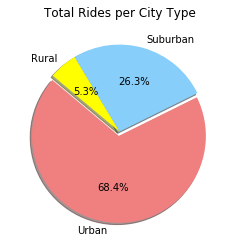

In [4]:
#Rides Data 
urban_data = combined_driver_data[combined_driver_data.type == "Urban"]
urban_rides = urban_data["ride_id"].count()

suburban_data = combined_driver_data[combined_driver_data.type == "Suburban"]
suburban_rides = suburban_data["ride_id"].count()

rural_data = combined_driver_data[combined_driver_data.type == "Rural"]
rural_rides = rural_data["ride_id"].count()

#Pie Data
sizes = [urban_rides, suburban_rides, rural_rides]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral","lightskyblue", "yellow"]
explode = (0.05, 0, 0)

#Pie setup and display  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides per City Type")
plt.savefig("Pie_Chart_Rides.png")
plt.show()


## Total Drivers by City Type

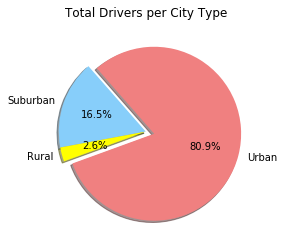

In [5]:
#Drivers Data 
urban_city_data = city_data[city_data.type == "Urban"]
urban_drivers_count = urban_city_data["driver_count"].sum()

suburban_city_data = city_data[city_data.type == "Suburban"]
suburban_drivers_count = suburban_city_data["driver_count"].sum()

rural_city_data = city_data[city_data.type == "Rural"]
rural_drivers_count = rural_city_data["driver_count"].sum()

#Pie Data
sizes = [urban_drivers_count, suburban_drivers_count, rural_drivers_count]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral","lightskyblue", "yellow"]
explode = (0.1, 0, 0)

#Pie setup and display  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Total Drivers per City Type")
plt.savefig("Pie_Chart_Drivers.png")
plt.show()
